<a href="https://colab.research.google.com/github/hosamkefah/Data-Analysis-with-Python/blob/main/RLF_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
example = pd.read_excel('drive/MyDrive/AI/RegionA_example.xlsx')

In [ ]:
example.head(10)

,Unnamed: 0,station_no,height,clutter_class
0,0,WS_17047,381,DENSE TREE
1,1,WS_17062,5,LOW-MEDIUM URBAN
2,2,WS_17063,99,AIRPORT
3,3,WS_17064,18,OPEN IN URBAN
4,4,WS_17065,123,LOW-SPARSE URBAN
5,5,WS_17389,0,SEA
6,6,WS_17437,8,SEA
7,7,WS_17448,13,SEA
8,8,WS_17610,83,DENSE TREE
9,9,WS_17813,41,SPARSE TREE


In [ ]:
distances = pd.read_csv('drive/MyDrive/AI/RegionA/distances.tsv', sep='\t')
met_forecast = pd.read_csv('drive/MyDrive/AI/RegionA/met-forecast.tsv', sep='\t')
met_real = pd.read_csv('drive/MyDrive/AI/RegionA/met-real.tsv', sep='\t')
met_stations = pd.read_csv('drive/MyDrive/AI/RegionA/met-stations.tsv', sep='\t')
rl_kpis = pd.read_csv('drive/MyDrive/AI/RegionA/rl-kpis.tsv', sep='\t')
rl_sites = pd.read_csv('drive/MyDrive/AI/RegionA/rl-sites.tsv', sep='\t')

/tmp/ipython-input-3379274313.py:3: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  met_real = pd.read_csv('drive/MyDrive/AI/RegionA/met-real.tsv', sep='\t')


In [ ]:
distances.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694 entries, 0 to 1693
Columns: 1695 entries, Unnamed: 0 to RL_[EOMJ
dtypes: float64(1694), object(1)
memory usage: 21.9+ MB


In [ ]:
met_forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20323 entries, 0 to 20322
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         20323 non-null  int64  
 1   station_no         20323 non-null  object 
 2   datetime           20323 non-null  object 
 3   report_time        20323 non-null  object 
 4   weather_day1       20323 non-null  object 
 5   temp_max_day1      20323 non-null  int64  
 6   temp_min_day1      20323 non-null  int64  
 7   humidity_max_day1  18186 non-null  float64
 8   humidity_min_day1  18186 non-null  float64
 9   wind_dir_day1      18186 non-null  float64
 10  wind_speed_day1    18186 non-null  float64
 11  weather_day2       20323 non-null  object 
 12  temp_max_day2      20323 non-null  int64  
 13  temp_min_day2      20323 non-null  int64  
 14  humidity_max_day2  18186 non-null  float64
 15  humidity_min_day2  18186 non-null  float64
 16  wind_dir_day2      181

In [ ]:
met_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479241 entries, 0 to 479240
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           479241 non-null  int64  
 1   station_no           479241 non-null  object 
 2   datetime             479241 non-null  object 
 3   measured_date        479241 non-null  object 
 4   measured_hour        479241 non-null  int64  
 5   temp                 449372 non-null  float64
 6   temp_max             425657 non-null  float64
 7   temp_min             425657 non-null  float64
 8   wind_dir             367689 non-null  float64
 9   wind_speed           368042 non-null  float64
 10  wind_dir_max         330211 non-null  object 
 11  wind_speed_max       337528 non-null  float64
 12  humidity             435358 non-null  float64
 13  precipitation        384301 non-null  float64
 14  precipitation_coeff  387171 non-null  float64
 15  pressure         

In [ ]:
met_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     20 non-null     int64 
 1   station_no     20 non-null     object
 2   height         20 non-null     int64 
 3   clutter_class  20 non-null     object
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes


In [ ]:
rl_kpis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992986 entries, 0 to 1992985
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   type                   object 
 2   datetime               object 
 3   tip                    object 
 4   mlid                   object 
 5   mw_connection_no       object 
 6   site_id                object 
 7   card_type              object 
 8   adaptive_modulation    object 
 9   freq_band              object 
 10  severaly_error_second  float64
 11  error_second           float64
 12  unavail_second         float64
 13  avail_time             float64
 14  bbe                    float64
 15  rxlevmax               float64
 16  capacity               float64
 17  modulation             object 
 18  rlf                    bool   
dtypes: bool(1), float64(7), int64(1), object(10)
memory usage: 275.6+ MB


In [ ]:
rl_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1674 non-null   int64  
 1   site_id        1674 non-null   object 
 2   groundheight   1674 non-null   float64
 3   clutter_class  1674 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 52.4+ KB


In [ ]:
rl_kpis_simple = rl_kpis[['datetime', 'site_id', 'rxlevmax', 'capacity', 'rlf']]
met_real_simple = met_real[['datetime', 'station_no', 'temp', 'humidity', 'wind_speed', 'precipitation']]
rl_sites_simple = rl_sites[['site_id', 'groundheight', 'clutter_class']]

In [ ]:
rl_kpis_simple.head(25)

,datetime,site_id,rxlevmax,capacity,rlf
0,2018-12-31,RL_;ABDV,-31.0,456.0,False
1,2018-12-31,RL_;ABDV,-30.7,456.0,False
2,2018-12-31,RL_;ABDV,-34.4,406.0,False
3,2018-12-31,RL_;ABDV,-35.3,247.0,False
4,2018-12-31,RL_;ABDV,-35.3,247.0,False
5,2018-12-31,RL_;ABDV,-38.2,456.0,False
6,2018-12-31,RL_;ABL>,-33.2,456.0,False
7,2018-12-31,RL_;ABL>,-31.0,456.0,False
8,2018-12-31,RL_;ABL>,-29.7,81.0,False
9,2018-12-31,RL_;ABTP,-39.8,72.0,False


In [ ]:
rl_kpis_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992986 entries, 0 to 1992985
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1   site_id   object 
 2   rxlevmax  float64
 3   capacity  float64
 4   rlf       bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 62.7+ MB


In [ ]:
rl_kpis_simple['datetime'] = pd.to_datetime(rl_kpis_simple['datetime'])
rl_kpis_simple['rlf'] = rl_kpis_simple['rlf'].astype('bool')

/tmp/ipython-input-2061045432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rl_kpis_simple['datetime'] = pd.to_datetime(rl_kpis_simple['datetime'])
/tmp/ipython-input-2061045432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rl_kpis_simple['rlf'] = rl_kpis_simple['rlf'].astype('bool')


In [ ]:
rl_kpis_simple_agg = rl_kpis_simple.groupby(['datetime', 'site_id']).agg(
    rxlevmax=('rxlevmax', 'mean'),
    capacity=('capacity', 'mean'),
    rlf=('rlf', 'any')
).reset_index()

In [ ]:
rl_kpis_simple_agg

,datetime,site_id,rxlevmax,capacity,rlf
0,2018-12-31,RL_;ABDV,-34.150000,378.0,False
1,2018-12-31,RL_;ABL>,-31.300000,331.0,False
2,2018-12-31,RL_;ABTP,-39.800000,72.0,False
3,2018-12-31,RL_;AC?E,-35.380000,471.6,False
4,2018-12-31,RL_;ADKP,-39.950000,406.0,False
...,...,...,...,...,...
1052751,2020-12-25,RL_bKNAP,-39.800000,406.0,False
1052752,2020-12-25,RL_bKNLF,-37.250000,406.0,False
1052753,2020-12-25,RL_bKNQF,-34.700000,406.0,False
1052754,2020-12-25,RL_bKZCQ,-34.316667,465.5,False


In [ ]:
rlf_percentage = rl_kpis_simple_agg['rlf'].value_counts(normalize=True)
rlf_percentage_org = rl_kpis_simple['rlf'].value_counts(normalize=True)

In [ ]:
rlf_percentage

,proportion
rlf,
False,99.902826
True,0.097174


In [ ]:
rlf_percentage_org

,proportion
rlf,
False,0.999388
True,0.000612


In [ ]:
met_real_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479241 entries, 0 to 479240
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   datetime       479241 non-null  object 
 1   station_no     479241 non-null  object 
 2   temp           449372 non-null  float64
 3   humidity       435358 non-null  float64
 4   wind_speed     368042 non-null  float64
 5   precipitation  384301 non-null  float64
dtypes: float64(4), object(2)
memory usage: 21.9+ MB


In [ ]:
met_real_simple.head(100)

,datetime,station_no,temp,humidity,wind_speed,precipitation
0,2018-01-01 01:00:00,WS_17062,8.5,85.0,5.4,0.0
1,2018-01-01 01:00:00,WS_17063,7.2,NaN,NaN,NaN
2,2018-01-01 01:00:00,WS_17064,8.3,83.0,1.8,0.0
3,2018-01-01 01:00:00,WS_17065,5.8,93.0,2.9,0.0
4,2018-01-01 01:00:00,WS_17389,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
95,2018-01-01 08:00:00,WS_17065,8.7,76.0,4.3,0.0
96,2018-01-01 08:00:00,WS_17389,NaN,NaN,NaN,NaN
97,2018-01-01 08:00:00,WS_17437,9.4,70.0,2.8,0.0
98,2018-01-01 08:00:00,WS_17610,7.9,83.0,3.8,4.5


In [ ]:
rl_sites_simple.head(100)

,site_id,groundheight,clutter_class
0,RL_;ABDV,107.9658,OPEN LAND
1,RL_;ABL>,97.9733,OPEN LAND
2,RL_;ABTP,3.0446,OPEN LAND
3,RL_;AC?E,85.0143,OPEN LAND
4,RL_;ADKP,192.9800,DENSE TREE
...,...,...,...
95,RL_IJTFO,103.9844,LOW-DENSE URBAN
96,RL_IJTKL,107.0290,INDUSTRIAL & COMMERCIAL
97,RL_IJU?@,113.9769,LOW-SPARSE URBAN
98,RL_IJUCH,86.0291,OPEN IN URBAN


In [ ]:
rl_sites_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site_id        1674 non-null   object 
 1   groundheight   1674 non-null   float64
 2   clutter_class  1674 non-null   object 
dtypes: float64(1), object(2)
memory usage: 39.4+ KB


In [ ]:
simple_distances = distances.head(20)

In [ ]:
simple_distances.drop(simple_distances.columns[1:21], axis=1, inplace=True)

/tmp/ipython-input-104576795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_distances.drop(simple_distances.columns[1:21], axis=1, inplace=True)


In [ ]:
simple_distances

,Unnamed: 0,RL_U7MPL,RL_X;ORF,RL_X;OE?,RL_\K[RM,RL_UBUGK,RL_X;OQA,RL_\K[LJ,RL_L=SKK,RL_\K[QH,...,RL_]=UC>,RL_]ITCK,RL_[KBDF,RL_X;O@O,RL_b?LMI,RL_]IC?O,RL_S:PQD,RL_JEZWL,RL_LKEII,RL_[EOMJ
0,WS_19111,50.96124,63.36847,72.61144,68.53121,51.29432,59.53805,70.86277,85.26848,65.94984,...,56.29052,39.88633,46.79774,59.53805,42.80078,41.30192,41.46846,47.79698,52.29356,42.63424
1,WS_17047,67.19889,79.02323,87.01715,83.85289,67.36543,75.52589,86.35099,98.75822,82.10422,...,72.02855,55.54109,63.03539,76.02551,58.87189,56.87341,57.53957,63.78482,67.44870,58.62208
2,WS_18397,18.90229,15.90457,14.98860,16.23765,18.23613,17.07035,18.73575,25.31408,20.31788,...,15.07187,22.73271,20.48442,20.40115,21.98328,21.65020,22.81598,18.98556,12.82358,21.98328
3,WS_17062,9.65932,21.98328,32.30876,27.31256,9.90913,18.15286,29.56085,45.79850,24.64792,...,14.98860,3.49734,5.49582,18.40267,1.66540,2.99772,0.91597,6.41179,11.90761,1.49886
4,WS_17813,6.91141,19.15210,29.47758,24.48138,7.07795,15.32168,26.72967,43.05059,21.81674,...,12.15742,5.24601,2.74791,15.73803,1.41559,3.99696,2.74791,3.58061,9.24297,1.66540
5,WS_17064,2.74791,10.90837,22.81598,16.48746,2.91445,6.57833,18.40267,36.63880,12.65704,...,5.16274,14.57225,6.74487,6.32852,10.90837,13.32320,12.24069,6.24525,7.82738,11.15818
6,WS_19112,6.66160,6.07871,17.32016,11.49126,6.24525,2.91445,13.65628,31.14298,9.32624,...,0.99924,17.56997,10.57529,5.57909,14.40571,16.15438,15.73803,9.49278,6.49506,14.65552
7,WS_17063,12.57377,0.91597,13.07339,5.99544,12.24069,4.08023,7.74411,26.64640,3.74715,...,7.24449,23.81522,16.65400,5.99544,20.65096,22.39963,21.98328,15.65476,12.24069,20.81750
8,WS_18736,16.23765,9.65932,10.07567,9.65932,15.57149,11.82434,12.24069,22.73271,13.98936,...,10.99164,23.39887,18.98556,15.15514,21.65020,22.14982,22.73271,17.48670,11.40799,21.73347
9,WS_17065,7.24449,9.90913,18.40267,14.23917,6.57833,7.99392,16.82054,31.80914,13.98936,...,4.41331,14.65552,9.57605,10.74183,12.32396,13.23993,13.48974,8.07719,2.16502,12.49050


In [ ]:
transposed_dis = simple_distances.T

In [ ]:
transposed_dis.columns = transposed_dis.iloc[0]  # set first row as header
transposed_dis = transposed_dis[1:]              # drop the first row

In [ ]:
transposed_dis

Unnamed: 0,WS_19111,WS_17047,WS_18397,WS_17062,WS_17813,WS_17064,WS_19112,WS_17063,WS_18736,WS_17065,WS_18399,WS_17610,WS_18792,WS_18735,WS_18100,WS_17437,WS_17448,WS_18403,WS_18404,WS_17389
RL_U7MPL,50.96124,67.19889,18.90229,9.65932,6.91141,2.74791,6.6616,12.57377,16.23765,7.24449,12.40723,39.63652,32.80838,52.21029,15.15514,12.57377,16.32092,8.57681,10.99164,13.40647
RL_X;ORF,63.36847,79.02323,15.90457,21.98328,19.1521,10.90837,6.07871,0.91597,9.65932,9.90913,9.49278,32.05895,22.73271,41.80154,7.4943,5.8289,8.82662,16.57073,22.06655,25.89697
RL_X;OE?,72.61144,87.01715,14.9886,32.30876,29.47758,22.81598,17.32016,13.07339,10.07567,18.40267,14.07263,21.73347,10.8251,29.39431,17.40343,17.15362,18.15286,24.48138,30.97644,37.30496
RL_\K[RM,68.53121,83.85289,16.23765,27.31256,24.48138,16.48746,11.49126,5.99544,9.65932,14.23917,11.82434,28.56161,18.15286,36.72207,10.07567,9.82586,10.99164,20.90077,26.89621,31.47606
RL_UBUGK,51.29432,67.36543,18.23613,9.90913,7.07795,2.91445,6.24525,12.24069,15.57149,6.57833,11.82434,39.05363,32.22549,51.54413,15.07187,12.40723,16.23765,8.16046,10.99164,13.98936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RL_]IC?O,41.30192,56.87341,21.6502,2.99772,3.99696,13.3232,16.15438,22.39963,22.14982,13.23993,17.90305,42.96732,38.72055,57.62284,25.73043,23.06579,26.89621,7.57757,1.58213,9.9924
RL_S:PQD,41.46846,57.53957,22.81598,0.91597,2.74791,12.24069,15.73803,21.98328,22.73271,13.48974,18.48594,44.21637,39.38671,58.45554,24.81446,22.23309,25.98024,8.66008,3.66388,8.07719
RL_JEZWL,47.79698,63.78482,18.98556,6.41179,3.58061,6.24525,9.49278,15.65476,17.4867,8.07719,13.40647,40.30268,34.30724,53.62588,18.65248,16.07111,19.90153,6.32852,7.41103,11.57453
RL_LKEII,52.29356,67.4487,12.82358,11.90761,9.24297,7.82738,6.49506,12.24069,11.40799,2.16502,7.16122,33.97416,28.14526,47.38063,17.15362,14.48898,18.56921,4.74639,10.57529,17.81978


In [ ]:
transposed_dis['Closest_Site'] = transposed_dis.iloc[:, 1:].idxmin(axis=1)

In [ ]:
transposed_dis

Unnamed: 0,WS_19111,WS_17047,WS_18397,WS_17062,WS_17813,WS_17064,WS_19112,WS_17063,WS_18736,WS_17065,...,WS_17610,WS_18792,WS_18735,WS_18100,WS_17437,WS_17448,WS_18403,WS_18404,WS_17389,Closest_Site
RL_U7MPL,50.96124,67.19889,18.90229,9.65932,6.91141,2.74791,6.6616,12.57377,16.23765,7.24449,...,39.63652,32.80838,52.21029,15.15514,12.57377,16.32092,8.57681,10.99164,13.40647,WS_17064
RL_X;ORF,63.36847,79.02323,15.90457,21.98328,19.1521,10.90837,6.07871,0.91597,9.65932,9.90913,...,32.05895,22.73271,41.80154,7.4943,5.8289,8.82662,16.57073,22.06655,25.89697,WS_17063
RL_X;OE?,72.61144,87.01715,14.9886,32.30876,29.47758,22.81598,17.32016,13.07339,10.07567,18.40267,...,21.73347,10.8251,29.39431,17.40343,17.15362,18.15286,24.48138,30.97644,37.30496,WS_18736
RL_\K[RM,68.53121,83.85289,16.23765,27.31256,24.48138,16.48746,11.49126,5.99544,9.65932,14.23917,...,28.56161,18.15286,36.72207,10.07567,9.82586,10.99164,20.90077,26.89621,31.47606,WS_17063
RL_UBUGK,51.29432,67.36543,18.23613,9.90913,7.07795,2.91445,6.24525,12.24069,15.57149,6.57833,...,39.05363,32.22549,51.54413,15.07187,12.40723,16.23765,8.16046,10.99164,13.98936,WS_17064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RL_]IC?O,41.30192,56.87341,21.6502,2.99772,3.99696,13.3232,16.15438,22.39963,22.14982,13.23993,...,42.96732,38.72055,57.62284,25.73043,23.06579,26.89621,7.57757,1.58213,9.9924,WS_18404
RL_S:PQD,41.46846,57.53957,22.81598,0.91597,2.74791,12.24069,15.73803,21.98328,22.73271,13.48974,...,44.21637,39.38671,58.45554,24.81446,22.23309,25.98024,8.66008,3.66388,8.07719,WS_17062
RL_JEZWL,47.79698,63.78482,18.98556,6.41179,3.58061,6.24525,9.49278,15.65476,17.4867,8.07719,...,40.30268,34.30724,53.62588,18.65248,16.07111,19.90153,6.32852,7.41103,11.57453,WS_17813
RL_LKEII,52.29356,67.4487,12.82358,11.90761,9.24297,7.82738,6.49506,12.24069,11.40799,2.16502,...,33.97416,28.14526,47.38063,17.15362,14.48898,18.56921,4.74639,10.57529,17.81978,WS_17065


In [ ]:
transposed_dis.drop(transposed_dis.columns[1:-1], axis=1, inplace=True)

In [ ]:
transposed_dis.drop(transposed_dis.columns[0:1], axis=1, inplace=True)

In [ ]:
transposed_dis

Unnamed: 0,Closest_Site
RL_U7MPL,WS_17064
RL_X;ORF,WS_17063
RL_X;OE?,WS_18736
RL_\K[RM,WS_17063
RL_UBUGK,WS_17064
...,...
RL_]IC?O,WS_18404
RL_S:PQD,WS_17062
RL_JEZWL,WS_17813
RL_LKEII,WS_17065


In [ ]:
transposed_dis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1674 entries, RL_U7MPL to RL_[EOMJ
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Closest_Site  1674 non-null   object
dtypes: object(1)
memory usage: 90.7+ KB


In [ ]:

met_real_simple.isnull().sum()

,0
datetime,0
station_no,0
temp,29869
humidity,43883
wind_speed,111199
precipitation,94940


In [ ]:
met_real_simple.shape

(479241, 6)

In [ ]:
met_real_simple['temp'].ffill(inplace=True)

met_real_simple['humidity'].interpolate(method='linear', inplace=True)

/tmp/ipython-input-2490197264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  met_real_simple['temp'].ffill(inplace=True)
/tmp/ipython-input-2490197264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  met_real_simple['temp'].ffill(inplace=True)
/tmp/ipython-input-2490197264.py:3: FutureWarning: A value is trying to be set on a copy of a

In [ ]:
met_real_simple.isnull().sum()

,0
datetime,0
station_no,0
temp,0
humidity,0
wind_speed,111199
precipitation,94940


In [ ]:
met_real_simple.describe()

,temp,humidity,wind_speed,precipitation
count,479241.000000,479241.000000,368042.000000,384301.000000
mean,16.665686,70.858876,3.797405,8.011645
std,14.671148,27.491034,3.855432,23.125138
min,-36.000000,0.000000,0.000000,0.000000
25%,9.300000,61.000000,1.600000,0.000000
50%,16.000000,78.000000,3.000000,0.000000
75%,21.900000,90.000000,4.900000,0.000000
max,298.000000,100.000000,117.000000,100.000000


In [ ]:
rl_kpis_simple_agg.head()

NameError: name 'rl_kpis_simple_agg' is not defined

In [ ]:
merged_df = pd.merge(rl_kpis_simple_agg, transposed_dis, left_on='site_id', right_index=True, how='left')

In [ ]:
merged_df

,datetime,site_id,rxlevmax,capacity,rlf,Closest_Site
0,2018-12-31,RL_;ABDV,-34.150000,378.0,False,WS_18403
1,2018-12-31,RL_;ABL>,-31.300000,331.0,False,WS_18403
2,2018-12-31,RL_;ABTP,-39.800000,72.0,False,WS_18397
3,2018-12-31,RL_;AC?E,-35.380000,471.6,False,WS_18397
4,2018-12-31,RL_;ADKP,-39.950000,406.0,False,WS_18399
...,...,...,...,...,...,...
1052751,2020-12-25,RL_bKNAP,-39.800000,406.0,False,WS_17064
1052752,2020-12-25,RL_bKNLF,-37.250000,406.0,False,WS_17064
1052753,2020-12-25,RL_bKNQF,-34.700000,406.0,False,WS_17064
1052754,2020-12-25,RL_bKZCQ,-34.316667,465.5,False,WS_17064


In [ ]:
merged_df.isnull().sum()

,0
datetime,0
site_id,0
rxlevmax,0
capacity,85
rlf,0
Closest_Site,0


In [ ]:
merged_df.dropna(subset=['capacity'], inplace=True)

In [ ]:
merged_df.isnull().sum()

,0
datetime,0
site_id,0
rxlevmax,0
capacity,0
rlf,0
Closest_Site,0


In [ ]:

final_merged_df = pd.merge(merged_df, rl_sites_simple, on='site_id', how='left')

In [ ]:
final_merged_df

,datetime,site_id,rxlevmax,capacity,rlf,Closest_Site,groundheight,clutter_class
0,2018-12-31,RL_;ABDV,-34.150000,378.0,False,WS_18403,107.9658,OPEN LAND
1,2018-12-31,RL_;ABL>,-31.300000,331.0,False,WS_18403,97.9733,OPEN LAND
2,2018-12-31,RL_;ABTP,-39.800000,72.0,False,WS_18397,3.0446,OPEN LAND
3,2018-12-31,RL_;AC?E,-35.380000,471.6,False,WS_18397,85.0143,OPEN LAND
4,2018-12-31,RL_;ADKP,-39.950000,406.0,False,WS_18399,192.9800,DENSE TREE
...,...,...,...,...,...,...,...,...
1052666,2020-12-25,RL_bKNAP,-39.800000,406.0,False,WS_17064,87.9808,LOW-DENSE URBAN
1052667,2020-12-25,RL_bKNLF,-37.250000,406.0,False,WS_17064,98.9881,AVERAGE-DENSE URBAN
1052668,2020-12-25,RL_bKNQF,-34.700000,406.0,False,WS_17064,148.9506,SPARSE TREE
1052669,2020-12-25,RL_bKZCQ,-34.316667,465.5,False,WS_17064,66.9809,HIGH-DENSE URBAN


In [ ]:
final_merged_df.isnull().sum()

,0
datetime,0
site_id,0
rxlevmax,0
capacity,0
rlf,0
Closest_Site,0
groundheight,0
clutter_class,0


In [ ]:
met_real_simple.isnull().sum()

,0
datetime,0
station_no,0
temp,0
humidity,0
wind_speed,111199
precipitation,94940


In [ ]:
# First, create a proper copy of the DataFrame
df_sorted = met_real_simple.copy()

# Ensure the 'datetime' column is in proper datetime format
df_sorted['datetime'] = pd.to_datetime(df_sorted['datetime'])

# Sort the data
df_sorted = df_sorted.sort_values(['station_no', 'datetime']).reset_index(drop=True)

In [ ]:
df_sorted

,datetime,station_no,temp,humidity,wind_speed,precipitation
0,2018-01-02 02:00:00,WS_17047,5.5,96.0,5.5,0.0
1,2018-01-02 05:00:00,WS_17047,5.9,93.0,5.6,0.0
2,2018-01-02 08:00:00,WS_17047,7.4,83.0,5.9,0.0
3,2018-01-02 09:00:00,WS_17047,8.5,80.0,5.6,0.0
4,2018-01-02 12:00:00,WS_17047,11.3,65.0,6.1,0.0
...,...,...,...,...,...,...
479236,2020-12-26 09:00:00,WS_19112,14.0,64.0,10.4,0.0
479237,2020-12-26 10:00:00,WS_19112,15.0,62.0,9.7,0.0
479238,2020-12-26 11:00:00,WS_19112,15.7,60.0,7.1,0.0
479239,2020-12-26 12:00:00,WS_19112,15.5,62.0,5.7,0.0


In [ ]:
# Use transform instead of apply - this avoids the indexing issues
df_sorted['temp'] = df_sorted.groupby('station_no')['temp'].transform('ffill')

# For interpolation, we need to use a slightly different approach
df_sorted['humidity'] = df_sorted.groupby('station_no')['humidity'].transform(
    lambda x: x.interpolate(method='linear')
)

df_sorted['wind_speed'] = df_sorted.groupby('station_no')['wind_speed'].transform('ffill')
df_sorted['precipitation'] = df_sorted.groupby('station_no')['precipitation'].transform('ffill')

In [ ]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479241 entries, 0 to 479240
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   datetime       479241 non-null  datetime64[ns]
 1   station_no     479241 non-null  object        
 2   temp           479241 non-null  float64       
 3   humidity       479241 non-null  float64       
 4   wind_speed     400872 non-null  float64       
 5   precipitation  458340 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 21.9+ MB


In [ ]:
df_sorted.isnull().sum()

,0
datetime,0
station_no,0
temp,0
humidity,0
wind_speed,78369
precipitation,20901


In [ ]:
# Next, create a new 'date' column by extracting the date part
df_sorted['date'] = df_sorted['datetime'].dt.date

# Then, group by 'date' and 'station_no' and calculate the mean of the other columns
daily_avg_weather = df_sorted.groupby(['date', 'station_no'])[['temp', 'humidity', 'wind_speed', 'precipitation']].mean().reset_index()

In [ ]:
daily_avg_weather['date'] = pd.to_datetime(daily_avg_weather['date'])

In [ ]:
daily_avg_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20067 entries, 0 to 20066
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           20067 non-null  datetime64[ns]
 1   station_no     20067 non-null  object        
 2   temp           20067 non-null  float64       
 3   humidity       20067 non-null  float64       
 4   wind_speed     16782 non-null  float64       
 5   precipitation  19194 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 940.8+ KB


In [ ]:
daily_avg_weather.isnull().sum()

,0
date,0
station_no,0
temp,0
humidity,0
wind_speed,3285
precipitation,873


In [ ]:
#daily_avg_weather_test = daily_avg_weather.dropna(subset=['temp', 'humidity', 'wind_speed', 'precipitation'])

In [ ]:
#daily_avg_weather_test

In [ ]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052671 entries, 0 to 1052670
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   datetime       1052671 non-null  datetime64[ns]
 1   site_id        1052671 non-null  object        
 2   rxlevmax       1052671 non-null  float64       
 3   capacity       1052671 non-null  float64       
 4   rlf            1052671 non-null  bool          
 5   Closest_Site   1052671 non-null  object        
 6   groundheight   1052671 non-null  float64       
 7   clutter_class  1052671 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(3), object(3)
memory usage: 57.2+ MB


In [ ]:
daily_avg_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20067 entries, 0 to 20066
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           20067 non-null  datetime64[ns]
 1   station_no     20067 non-null  object        
 2   temp           20067 non-null  float64       
 3   humidity       20067 non-null  float64       
 4   wind_speed     16782 non-null  float64       
 5   precipitation  19194 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 940.8+ KB


In [ ]:
merged_df_with_weather = pd.merge(
    final_merged_df,
    daily_avg_weather,
    left_on=['datetime', 'Closest_Site'],
    right_on=['date', 'station_no'],
    how='left'
)

In [ ]:
merged_df_with_weather

,datetime,site_id,rxlevmax,capacity,rlf,Closest_Site,groundheight,clutter_class,date,station_no,temp,humidity,wind_speed,precipitation
0,2018-12-31,RL_;ABDV,-34.150000,378.0,False,WS_18403,107.9658,OPEN LAND,2018-12-31,WS_18403,3.783333,93.125000,2.475000,0.0
1,2018-12-31,RL_;ABL>,-31.300000,331.0,False,WS_18403,97.9733,OPEN LAND,2018-12-31,WS_18403,3.783333,93.125000,2.475000,0.0
2,2018-12-31,RL_;ABTP,-39.800000,72.0,False,WS_18397,3.0446,OPEN LAND,2018-12-31,WS_18397,4.216667,90.166667,1.262500,0.0
3,2018-12-31,RL_;AC?E,-35.380000,471.6,False,WS_18397,85.0143,OPEN LAND,2018-12-31,WS_18397,4.216667,90.166667,1.262500,0.0
4,2018-12-31,RL_;ADKP,-39.950000,406.0,False,WS_18399,192.9800,DENSE TREE,2018-12-31,WS_18399,3.666667,90.166667,1.604167,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052666,2020-12-25,RL_bKNAP,-39.800000,406.0,False,WS_17064,87.9808,LOW-DENSE URBAN,2020-12-25,WS_17064,14.091667,62.583333,1.445833,0.0
1052667,2020-12-25,RL_bKNLF,-37.250000,406.0,False,WS_17064,98.9881,AVERAGE-DENSE URBAN,2020-12-25,WS_17064,14.091667,62.583333,1.445833,0.0
1052668,2020-12-25,RL_bKNQF,-34.700000,406.0,False,WS_17064,148.9506,SPARSE TREE,2020-12-25,WS_17064,14.091667,62.583333,1.445833,0.0
1052669,2020-12-25,RL_bKZCQ,-34.316667,465.5,False,WS_17064,66.9809,HIGH-DENSE URBAN,2020-12-25,WS_17064,14.091667,62.583333,1.445833,0.0


In [ ]:
merged_df_with_weather.isnull().sum()

,0
datetime,0
site_id,0
rxlevmax,0
capacity,0
rlf,0
Closest_Site,0
groundheight,0
clutter_class,0
date,58477
station_no,58477


In [ ]:
merged_df_with_weather= merged_df_with_weather.dropna(subset=['date', 'wind_speed', 'precipitation'])

In [ ]:
merged_df_with_weather.isnull().sum()

,0
datetime,0
site_id,0
rxlevmax,0
capacity,0
rlf,0
Closest_Site,0
groundheight,0
clutter_class,0
date,0
station_no,0


In [ ]:
merged_df_with_weather

,datetime,site_id,rxlevmax,capacity,rlf,Closest_Site,groundheight,clutter_class,date,station_no,temp,humidity,wind_speed,precipitation
0,2018-12-31,RL_;ABDV,-34.150000,378.0,False,WS_18403,107.9658,OPEN LAND,2018-12-31,WS_18403,3.783333,93.125000,2.475000,0.0
1,2018-12-31,RL_;ABL>,-31.300000,331.0,False,WS_18403,97.9733,OPEN LAND,2018-12-31,WS_18403,3.783333,93.125000,2.475000,0.0
2,2018-12-31,RL_;ABTP,-39.800000,72.0,False,WS_18397,3.0446,OPEN LAND,2018-12-31,WS_18397,4.216667,90.166667,1.262500,0.0
3,2018-12-31,RL_;AC?E,-35.380000,471.6,False,WS_18397,85.0143,OPEN LAND,2018-12-31,WS_18397,4.216667,90.166667,1.262500,0.0
4,2018-12-31,RL_;ADKP,-39.950000,406.0,False,WS_18399,192.9800,DENSE TREE,2018-12-31,WS_18399,3.666667,90.166667,1.604167,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052666,2020-12-25,RL_bKNAP,-39.800000,406.0,False,WS_17064,87.9808,LOW-DENSE URBAN,2020-12-25,WS_17064,14.091667,62.583333,1.445833,0.0
1052667,2020-12-25,RL_bKNLF,-37.250000,406.0,False,WS_17064,98.9881,AVERAGE-DENSE URBAN,2020-12-25,WS_17064,14.091667,62.583333,1.445833,0.0
1052668,2020-12-25,RL_bKNQF,-34.700000,406.0,False,WS_17064,148.9506,SPARSE TREE,2020-12-25,WS_17064,14.091667,62.583333,1.445833,0.0
1052669,2020-12-25,RL_bKZCQ,-34.316667,465.5,False,WS_17064,66.9809,HIGH-DENSE URBAN,2020-12-25,WS_17064,14.091667,62.583333,1.445833,0.0


In [ ]:
merged_df_with_weather.drop(columns=['station_no', 'date', 'Closest_Site'], inplace=True)

/tmp/ipython-input-2652443361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_with_weather.drop(columns=['station_no', 'date', 'Closest_Site'], inplace=True)


In [ ]:
merged_df_with_weather

,datetime,site_id,rxlevmax,capacity,rlf,groundheight,clutter_class,temp,humidity,wind_speed,precipitation
0,2018-12-31,RL_;ABDV,-34.150000,378.0,False,107.9658,OPEN LAND,3.783333,93.125000,2.475000,0.0
1,2018-12-31,RL_;ABL>,-31.300000,331.0,False,97.9733,OPEN LAND,3.783333,93.125000,2.475000,0.0
2,2018-12-31,RL_;ABTP,-39.800000,72.0,False,3.0446,OPEN LAND,4.216667,90.166667,1.262500,0.0
3,2018-12-31,RL_;AC?E,-35.380000,471.6,False,85.0143,OPEN LAND,4.216667,90.166667,1.262500,0.0
4,2018-12-31,RL_;ADKP,-39.950000,406.0,False,192.9800,DENSE TREE,3.666667,90.166667,1.604167,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1052666,2020-12-25,RL_bKNAP,-39.800000,406.0,False,87.9808,LOW-DENSE URBAN,14.091667,62.583333,1.445833,0.0
1052667,2020-12-25,RL_bKNLF,-37.250000,406.0,False,98.9881,AVERAGE-DENSE URBAN,14.091667,62.583333,1.445833,0.0
1052668,2020-12-25,RL_bKNQF,-34.700000,406.0,False,148.9506,SPARSE TREE,14.091667,62.583333,1.445833,0.0
1052669,2020-12-25,RL_bKZCQ,-34.316667,465.5,False,66.9809,HIGH-DENSE URBAN,14.091667,62.583333,1.445833,0.0


In [ ]:
merged_df_with_weather.isnull().sum()

,0
datetime,0
site_id,0
rxlevmax,0
capacity,0
rlf,0
groundheight,0
clutter_class,0
temp,0
humidity,0
wind_speed,0


In [ ]:
rlf_percentage = merged_df_with_weather['rlf'].value_counts(normalize=True)

In [ ]:
rlf_percentage

,proportion
rlf,
False,0.999
True,0.001


In [ ]:
merged_df_with_weather

,datetime,site_id,rxlevmax,capacity,rlf,groundheight,clutter_class,temp,humidity,wind_speed,precipitation
0,2018-12-31,RL_;ABDV,-34.150000,378.0,False,107.9658,OPEN LAND,3.783333,93.125000,2.475000,0.0
1,2018-12-31,RL_;ABL>,-31.300000,331.0,False,97.9733,OPEN LAND,3.783333,93.125000,2.475000,0.0
2,2018-12-31,RL_;ABTP,-39.800000,72.0,False,3.0446,OPEN LAND,4.216667,90.166667,1.262500,0.0
3,2018-12-31,RL_;AC?E,-35.380000,471.6,False,85.0143,OPEN LAND,4.216667,90.166667,1.262500,0.0
4,2018-12-31,RL_;ADKP,-39.950000,406.0,False,192.9800,DENSE TREE,3.666667,90.166667,1.604167,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1052666,2020-12-25,RL_bKNAP,-39.800000,406.0,False,87.9808,LOW-DENSE URBAN,14.091667,62.583333,1.445833,0.0
1052667,2020-12-25,RL_bKNLF,-37.250000,406.0,False,98.9881,AVERAGE-DENSE URBAN,14.091667,62.583333,1.445833,0.0
1052668,2020-12-25,RL_bKNQF,-34.700000,406.0,False,148.9506,SPARSE TREE,14.091667,62.583333,1.445833,0.0
1052669,2020-12-25,RL_bKZCQ,-34.316667,465.5,False,66.9809,HIGH-DENSE URBAN,14.091667,62.583333,1.445833,0.0


In [ ]:
merged_df_with_weather.to_csv('outputs.csv', index=False)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('drive/MyDrive/outputs.csv')

In [ ]:
df

,datetime,site_id,rxlevmax,capacity,rlf,groundheight,clutter_class,temp,humidity,wind_speed,precipitation
0,2018-12-31,RL_;ABDV,-34.150000,378.0,False,107.9658,OPEN LAND,3.783333,93.125000,2.475000,0.0
1,2018-12-31,RL_;ABL>,-31.300000,331.0,False,97.9733,OPEN LAND,3.783333,93.125000,2.475000,0.0
2,2018-12-31,RL_;ABTP,-39.800000,72.0,False,3.0446,OPEN LAND,4.216667,90.166667,1.262500,0.0
3,2018-12-31,RL_;AC?E,-35.380000,471.6,False,85.0143,OPEN LAND,4.216667,90.166667,1.262500,0.0
4,2018-12-31,RL_;ADKP,-39.950000,406.0,False,192.9800,DENSE TREE,3.666667,90.166667,1.604167,0.0
...,...,...,...,...,...,...,...,...,...,...,...
924267,2020-12-25,RL_bKNAP,-39.800000,406.0,False,87.9808,LOW-DENSE URBAN,14.091667,62.583333,1.445833,0.0
924268,2020-12-25,RL_bKNLF,-37.250000,406.0,False,98.9881,AVERAGE-DENSE URBAN,14.091667,62.583333,1.445833,0.0
924269,2020-12-25,RL_bKNQF,-34.700000,406.0,False,148.9506,SPARSE TREE,14.091667,62.583333,1.445833,0.0
924270,2020-12-25,RL_bKZCQ,-34.316667,465.5,False,66.9809,HIGH-DENSE URBAN,14.091667,62.583333,1.445833,0.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


/tmp/ipython-input-3253962684.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('site_id', group_keys=False).apply(lambda x: x.iloc[7:]).reset_index(drop=True)


0:	test: 0.5526203	best: 0.5526203 (0)	total: 1.41s	remaining: 47m 4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.699632263
bestIteration = 42

Shrink model to first 43 iterations.
Valid ROC-AUC: 0.699632263019623
Valid PR-AUC : 0.003312712676249838
 Test ROC-AUC: 0.9310297731666711
 Test PR-AUC : 0.067346850215906


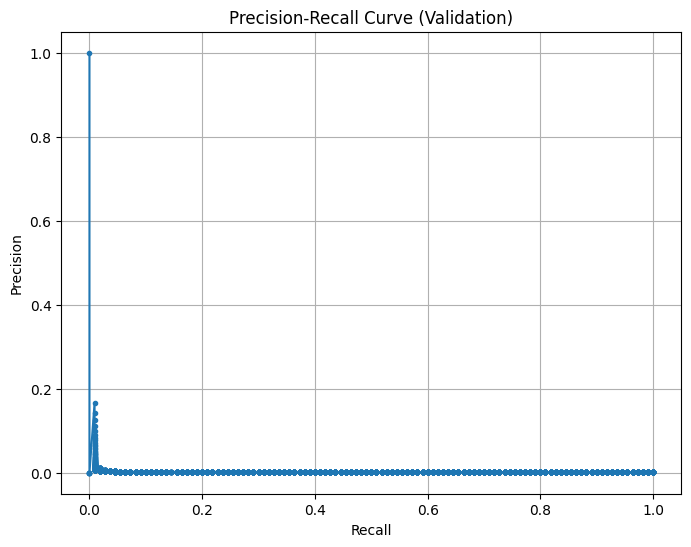

Best threshold by F1 = 0.8187, Precision=0.167, Recall=0.009
              precision    recall  f1-score   support

           0     0.9986    0.9951    0.9969    136810
           1     0.0838    0.2430    0.1246       251

    accuracy                         0.9937    137061
   macro avg     0.5412    0.6191    0.5607    137061
weighted avg     0.9969    0.9937    0.9953    137061



In [ ]:
!pip install catboost scikit-learn pandas numpy matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    precision_recall_curve, classification_report
)

df = df.copy()
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values(['site_id', 'datetime'])

df['dow']   = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['is_weekend'] = (df['dow'] >= 5).astype(int)

num_cols = ['rxlevmax','capacity','temp','humidity','wind_speed','precipitation']
g = df.groupby('site_id', group_keys=False)

for c in num_cols:
    df[f'{c}_lag1'] = g[c].shift(1)
    df[f'{c}_roll3_mean'] = g[c].shift(1).rolling(3, min_periods=1).mean()
    df[f'{c}_roll7_mean'] = g[c].shift(1).rolling(7, min_periods=1).mean()
    df[f'{c}_delta1'] = df[c] - df[f'{c}_lag1']

df['rlf_int'] = df['rlf'].astype(int)
df['rlf_prev7'] = g['rlf_int'].shift(1).rolling(7, min_periods=1).mean()
df = df.drop(columns=['rlf_int'])

df = df.groupby('site_id', group_keys=False).apply(lambda x: x.iloc[7:]).reset_index(drop=True)

cut1 = df['datetime'].quantile(0.7)
cut2 = df['datetime'].quantile(0.85)

train = df[df['datetime'] <  cut1]
valid = df[(df['datetime'] >= cut1) & (df['datetime'] < cut2)]
test  = df[df['datetime'] >= cut2]

target = 'rlf'
cat_cols = ['site_id','clutter_class','dow','month','is_weekend']

feature_cols = (
    ['rxlevmax','capacity','groundheight','temp','humidity','wind_speed','precipitation'] +
    [f'{c}_lag1' for c in num_cols] +
    [f'{c}_roll3_mean' for c in num_cols] +
    [f'{c}_roll7_mean' for c in num_cols] +
    [f'{c}_delta1' for c in num_cols] +
    ['rlf_prev7'] +
    cat_cols
)

X_tr, y_tr = train[feature_cols], train[target].astype(int)
X_va, y_va = valid[feature_cols], valid[target].astype(int)
X_te, y_te = test[feature_cols],  test[target].astype(int)

cat_idx = [feature_cols.index(c) for c in cat_cols]

train_pool = Pool(X_tr, y_tr, cat_features=cat_idx)
valid_pool = Pool(X_va, y_va, cat_features=cat_idx)
test_pool  = Pool(X_te, y_te, cat_features=cat_idx)

model = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.05,
    depth=8,
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    auto_class_weights='Balanced',
    od_type='Iter',
    od_wait=100,
    verbose=200,
)

model.fit(train_pool, eval_set=valid_pool)

p_va = model.predict_proba(valid_pool)[:,1]
p_te = model.predict_proba(test_pool)[:,1]

print("Valid ROC-AUC:", roc_auc_score(y_va, p_va))
print("Valid PR-AUC :", average_precision_score(y_va, p_va))
print(" Test ROC-AUC:", roc_auc_score(y_te, p_te))
print(" Test PR-AUC :", average_precision_score(y_te, p_te))

prec, rec, thr = precision_recall_curve(y_va, p_va)

f1 = 2 * (prec * rec) / (prec + rec + 1e-9)
best_idx = np.argmax(f1)
best_th = thr[best_idx-1] if best_idx > 0 else 0.5

print(f"Best threshold by F1 = {best_th:.4f}, Precision={prec[best_idx]:.3f}, Recall={rec[best_idx]:.3f}")

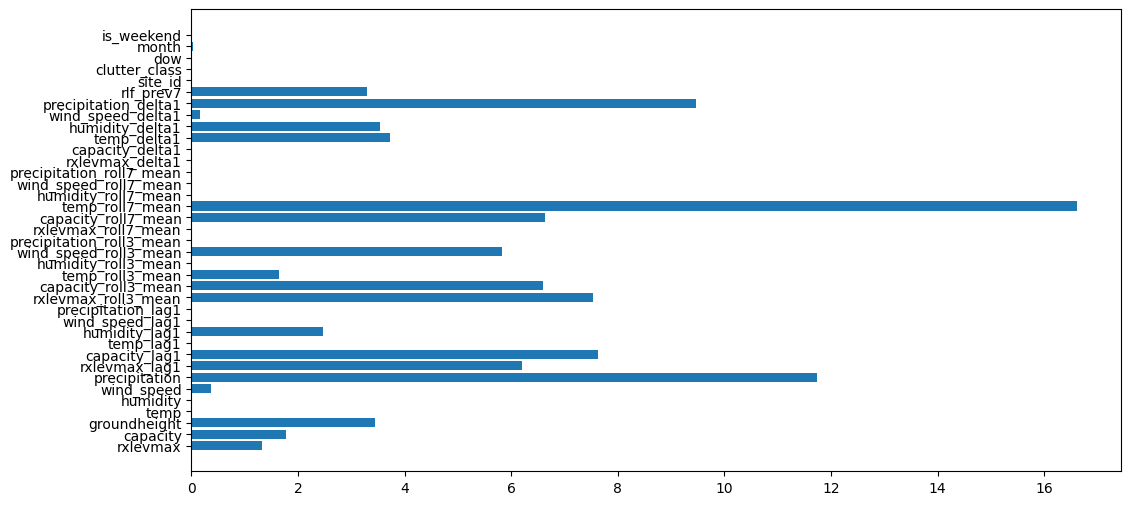

In [ ]:
import matplotlib.pyplot as plt
feat_imp = model.get_feature_importance(train_pool)
plt.figure(figsize=(12,6))
plt.barh(feature_cols, feat_imp)
plt.show()
